In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
tech_pd=pd.read_csv('technical_support_data-2.csv')
tech_pd.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [18]:
tech_pd=tech_pd.drop(['PROBLEM_TYPE'],axis=1)

In [19]:
tech_pd.describe()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,142.782609,1.973913,63.000000,0.137826,0.100000,69.956522,30.043478
std,155.098197,0.982676,58.877376,0.118627,0.182109,37.350281,37.350281
min,3.000000,1.000000,5.000000,0.010000,0.000000,5.000000,0.000000
25%,23.500000,1.150000,17.000000,0.025000,0.000000,55.000000,0.000000
50%,72.000000,2.000000,35.000000,0.140000,0.000000,90.000000,10.000000
75%,211.500000,2.300000,128.500000,0.235000,0.130000,100.000000,45.000000
max,520.000000,4.300000,180.000000,0.350000,0.700000,100.000000,95.000000


In [20]:
tech_pd.shape

(23, 7)

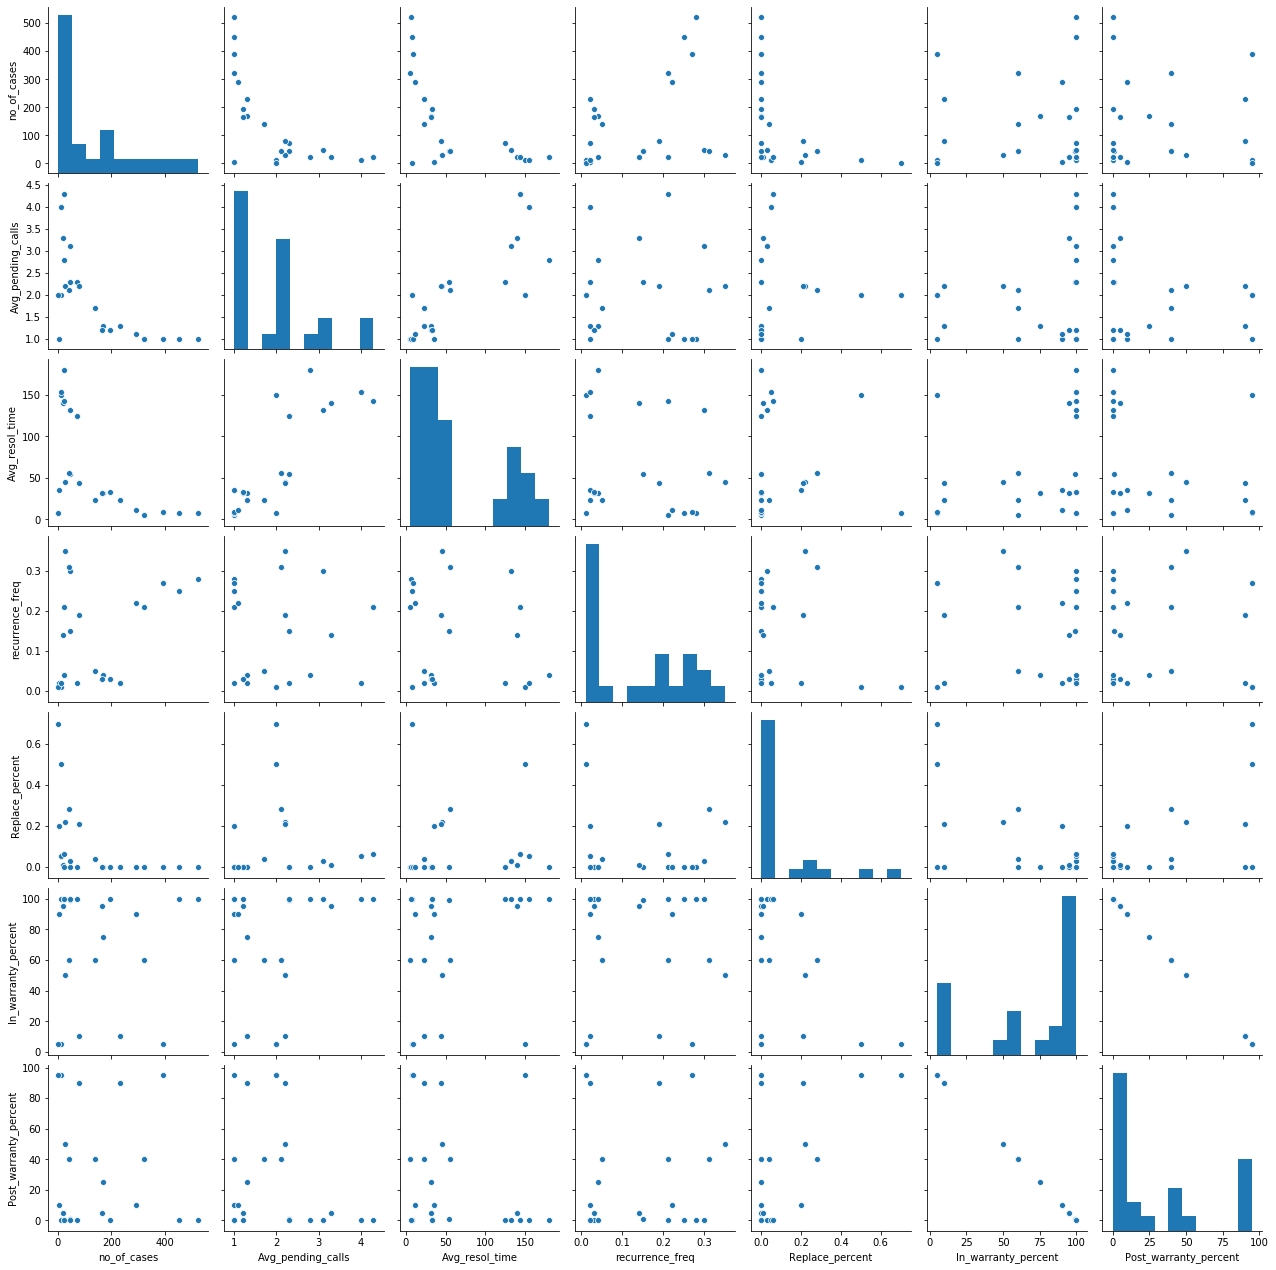

In [21]:
sns.pairplot(tech_pd[['no_of_cases','Avg_pending_calls','Avg_resol_time','recurrence_freq','Replace_percent','In_warranty_percent','Post_warranty_percent']])

In [22]:
from scipy.stats import zscore
tech_pd_scaled=tech_pd.apply(zscore)

In [23]:
tech_pd_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(tech_pd_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
from scipy.spatial.distance import cdist
mindist=sum(np.min(cdist(tech_pd_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/tech_pd_scaled.shape[0]
print(mindist)

1.4632577627349272


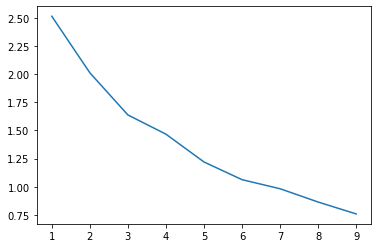

In [34]:
mindistortions=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(tech_pd_scaled)
    mindistortions.append(sum(np.min(cdist(tech_pd_scaled,kmeans.cluster_centers_),axis=1))/tech_pd_scaled.shape[0])

sns.lineplot(x=range(1,10),y=mindistortions)

In [35]:
#k=6
kmeans=KMeans(n_clusters=6)
kmeans.fit(tech_pd_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
prediction=kmeans.predict(tech_pd_scaled)

In [38]:
prediction

array([1, 0, 1, 0, 1, 4, 4, 1, 3, 4, 4, 2, 1, 4, 3, 3, 2, 1, 4, 3, 5, 5,
       5])

In [40]:
tech_pd_scaled['group']=prediction
tech_pd_scaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,1
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,4
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,4
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,1
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,3
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,4
